<a href="https://colab.research.google.com/github/raneymjohnGit/Austin_TX_House_Listings/blob/jayanbranch/House_Listings_Rough_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from termcolor import colored as cl # text customization

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (40, 20) # plot size

In [10]:
from google.colab import files
uploaded = files.upload()

Saving AustinHousingDataRough.csv to AustinHousingDataRough (3).csv


In [13]:
import io
housing_data_df = pd.read_csv(io.BytesIO(uploaded['AustinHousingDataRough.csv']))

In [14]:
housing_data_df.head(5)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
2,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
3,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg
4,60134835,pflugerville,15009 Drusillas Dr,78660,"Wonderful home, freshly painted throughout, ne...",30.439404,-97.658035,1.98,0,True,...,1,1,1.166667,4.000000,1223,14,3.0,3,2,60134835_47efc51704a66b45a8a134022ceeddb1-p_f.jpg


In [15]:
housing_data_df.dropna(inplace = True)

print(cl(housing_data_df.isnull().sum(), attrs = ['bold']))

zpid                          0
city                          0
streetAddress                 0
zipcode                       0
description                   0
latitude                      0
longitude                     0
propertyTaxRate               0
garageSpaces                  0
hasAssociation                0
hasCooling                    0
hasGarage                     0
hasHeating                    0
hasSpa                        0
hasView                       0
homeType                      0
parkingSpaces                 0
yearBuilt                     0
latestPrice                   0
numPriceChanges               0
latest_saledate               0
latest_salemonth              0
latest_saleyear               0
latestPriceSource             0
numOfPhotos                   0
numOfAccessibilityFeatures    0
numOfAppliances               0
numOfParkingFeatures          0
numOfPatioAndPorchFeatures    0
numOfSecurityFeatures         0
numOfWaterfrontFeatures       0
numOfWin

In [16]:
print(cl(housing_data_df.dtypes, attrs = ['bold']))


zpid                            int64
city                           object
streetAddress                  object
zipcode                         int64
description                    object
latitude                      float64
longitude                     float64
propertyTaxRate               float64
garageSpaces                    int64
hasAssociation                   bool
hasCooling                       bool
hasGarage                        bool
hasHeating                       bool
hasSpa                           bool
hasView                          bool
homeType                       object
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                     int64
numPriceChanges                 int64
latest_saledate                object
latest_salemonth                int64
latest_saleyear                 int64
latestPriceSource              object
numOfPhotos                     int64
numOfAccessibilityFeatures      int64
numOfApplian

In [17]:
df = housing_data_df[['livingAreaSqFt','avgSchoolRating','numOfBathrooms','latestPrice']]
df.head(10)

,livingAreaSqFt,avgSchoolRating,numOfBathrooms,latestPrice
0,2601,2.666667,3.0,305000
1,1478,3.000000,2.0,256125
2,1678,2.666667,2.0,240000
3,2132,4.000000,3.0,239900
4,1422,4.000000,3.0,219900
5,1870,4.000000,2.0,225000
6,1422,3.000000,3.0,194800
7,2281,3.000000,3.0,250000
8,1326,3.000000,2.0,200000
9,1752,3.333333,2.0,212000


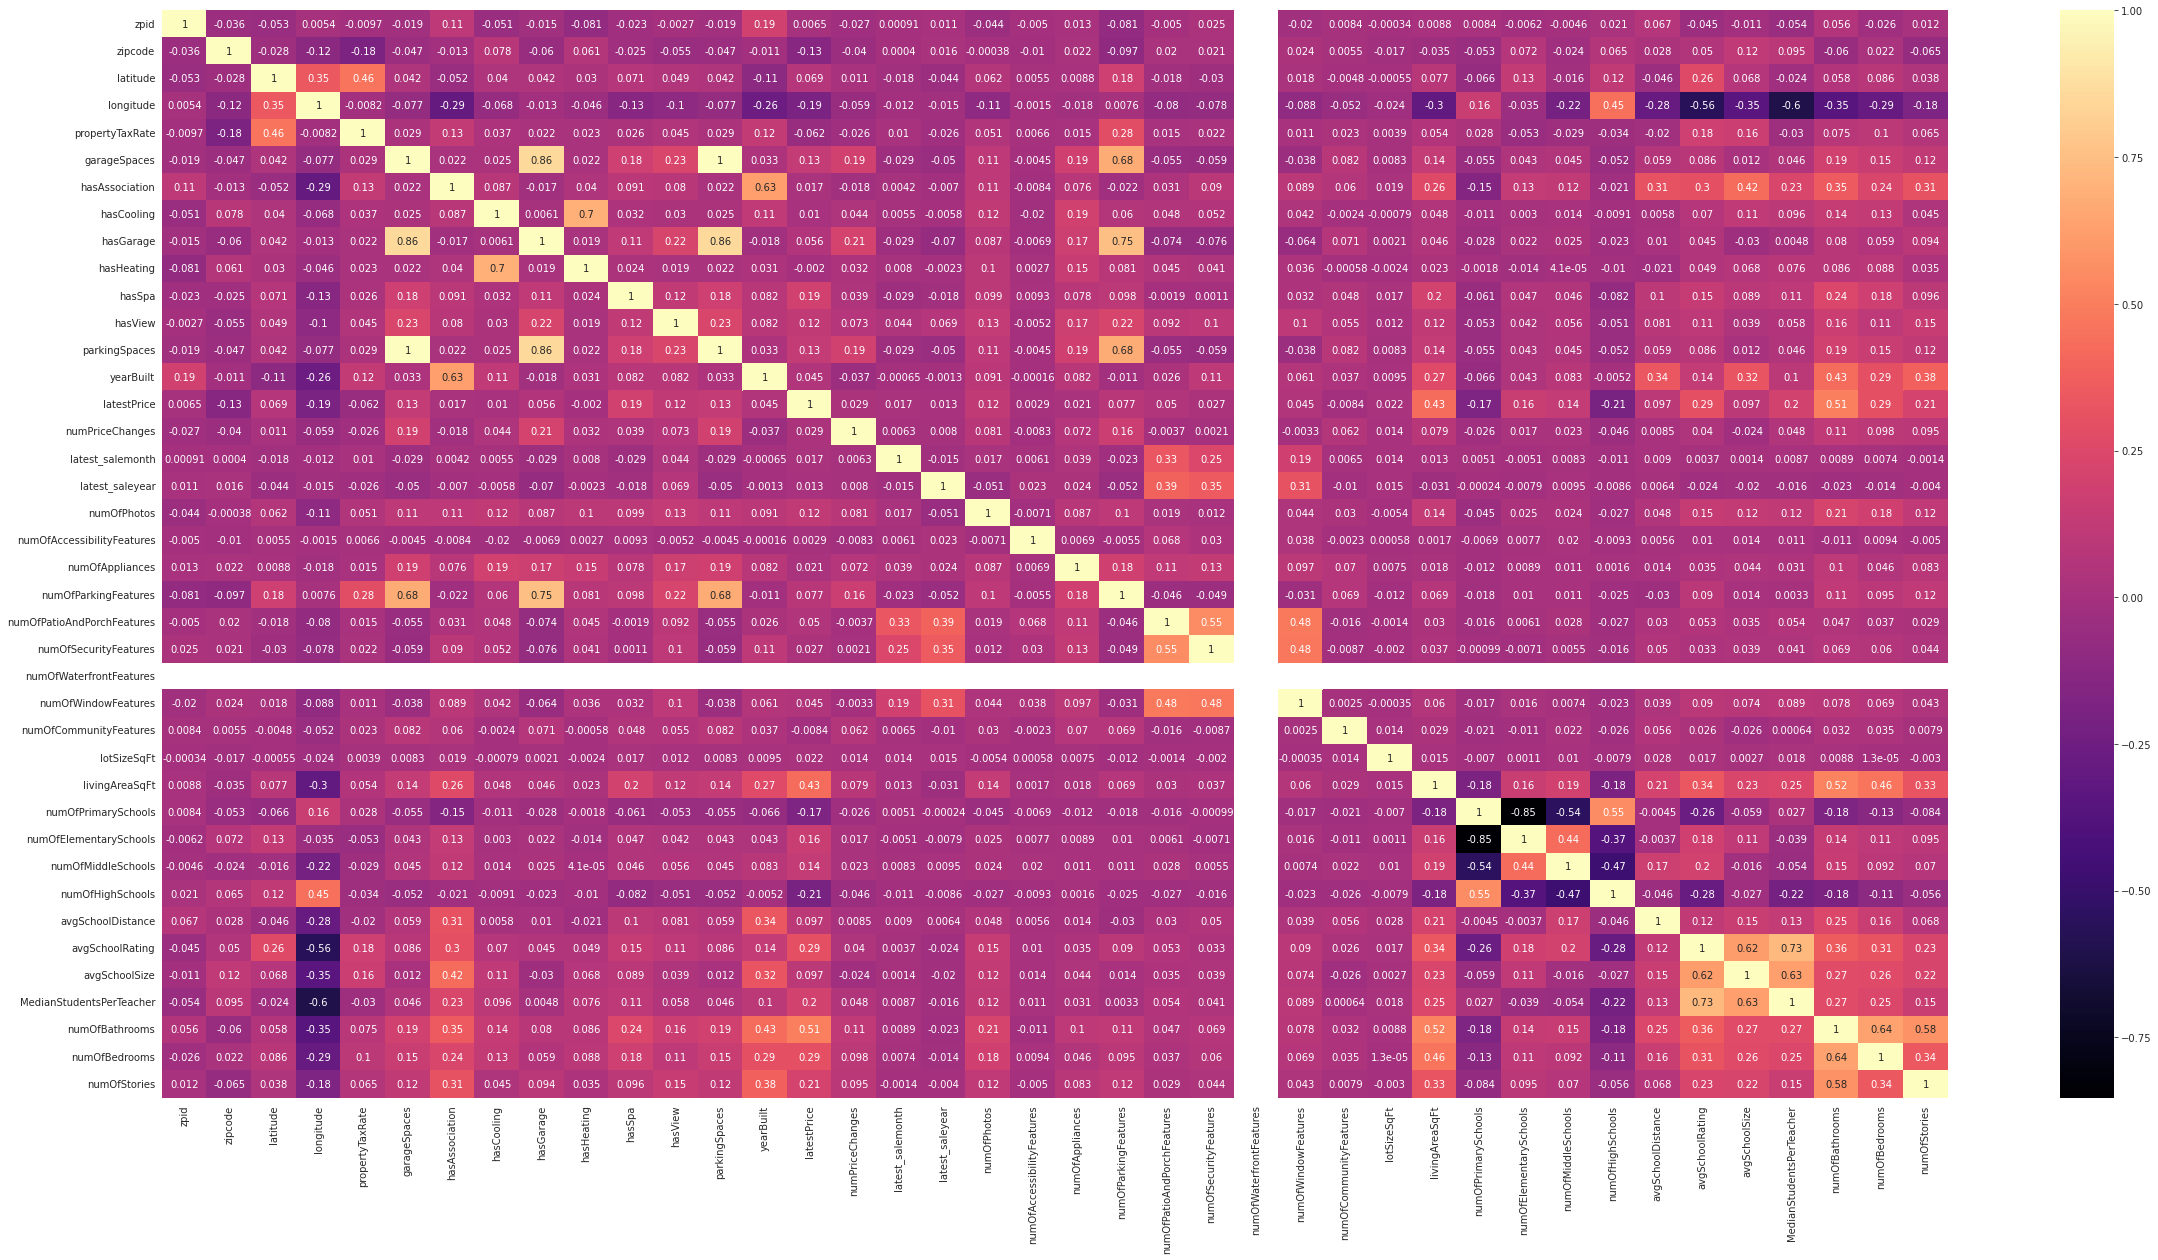

In [18]:
# 1. Heatmap

sb.heatmap(housing_data_df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

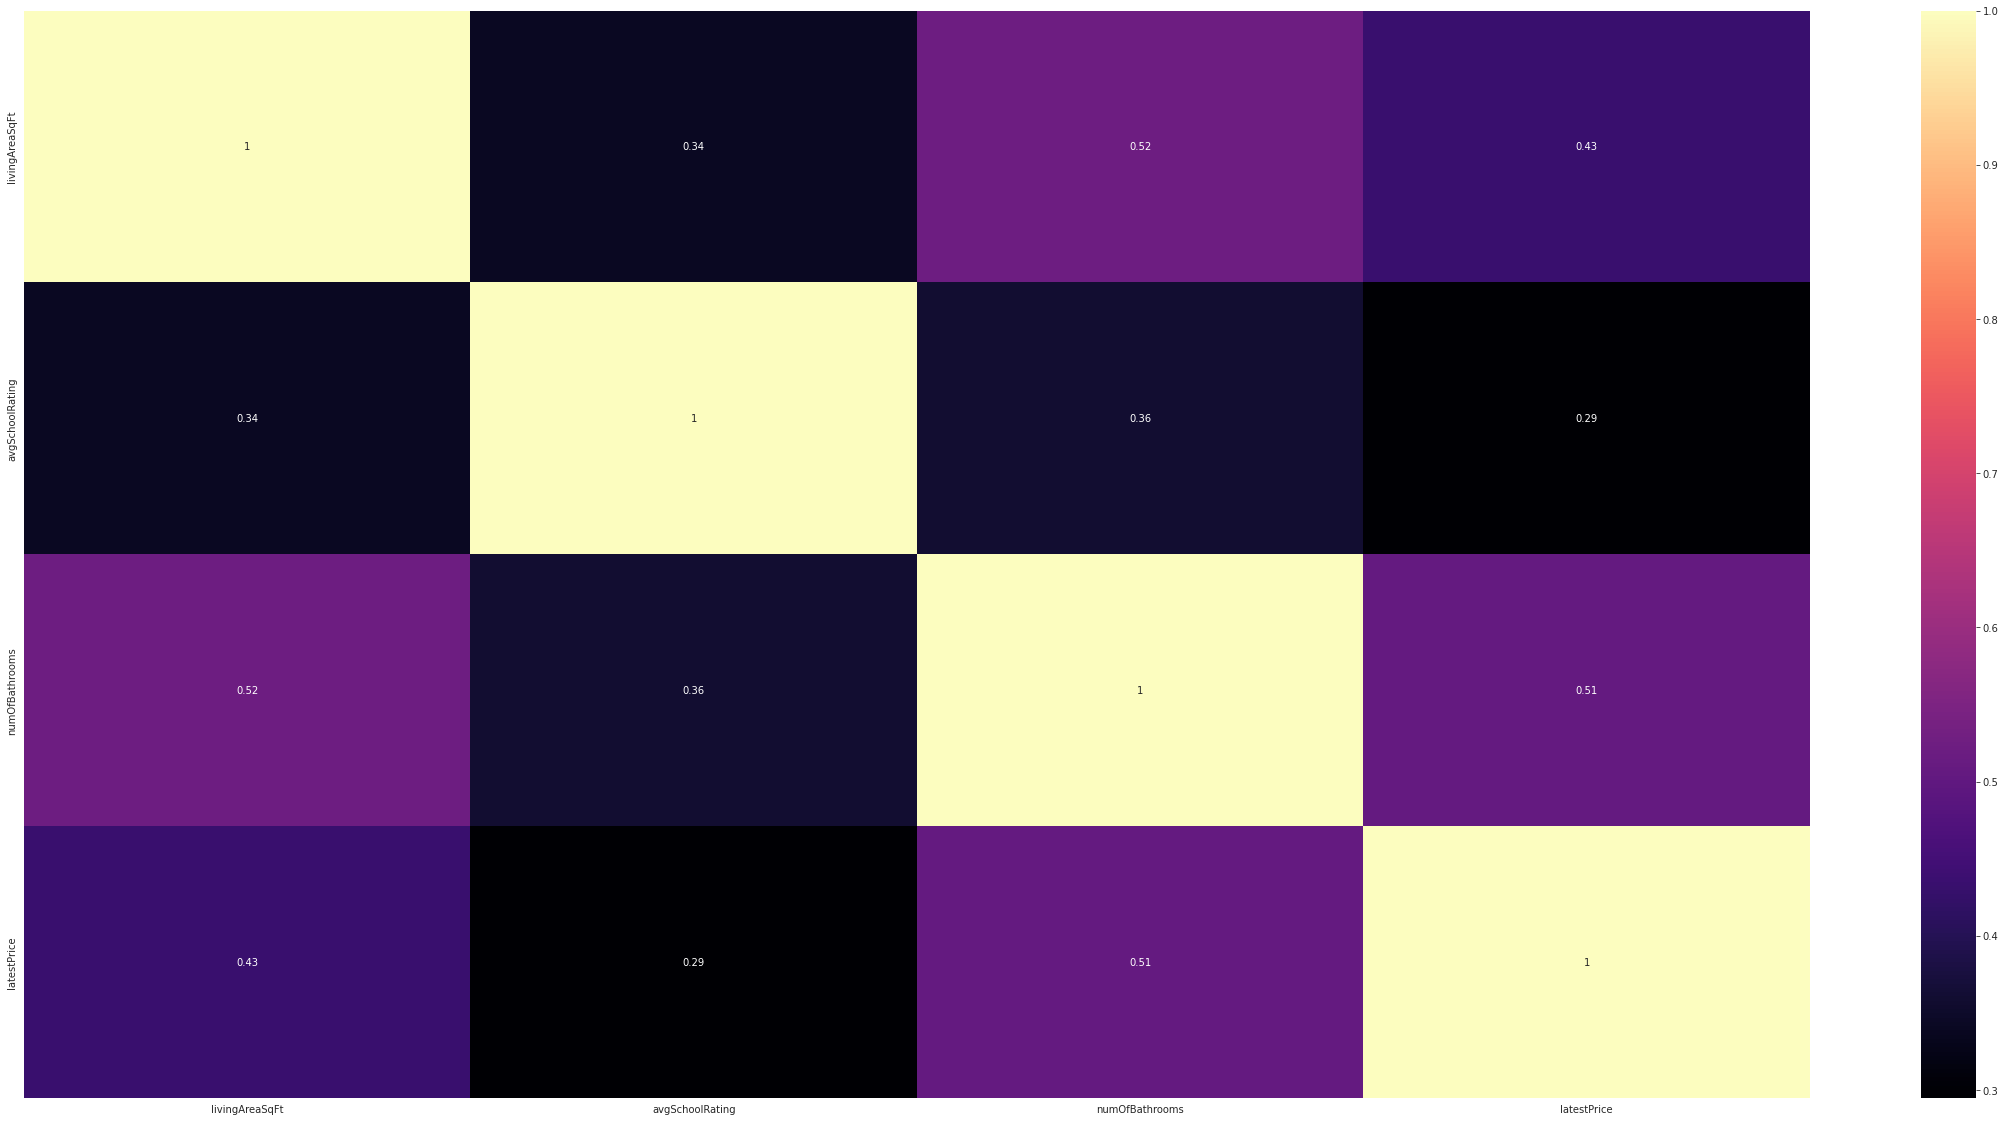

In [19]:
sb.heatmap(df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


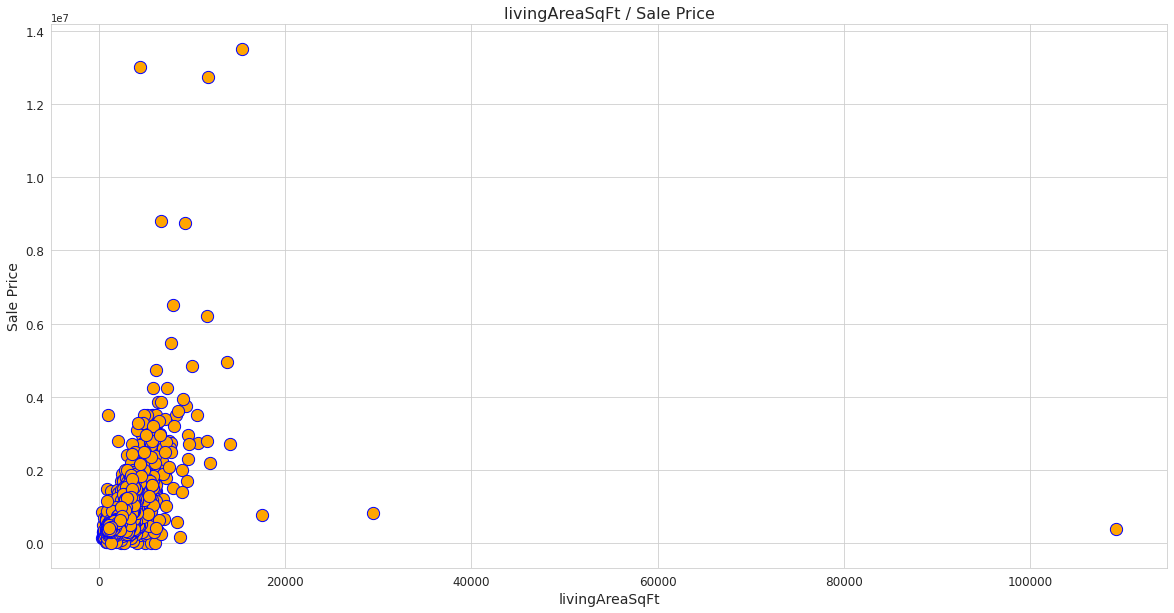

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


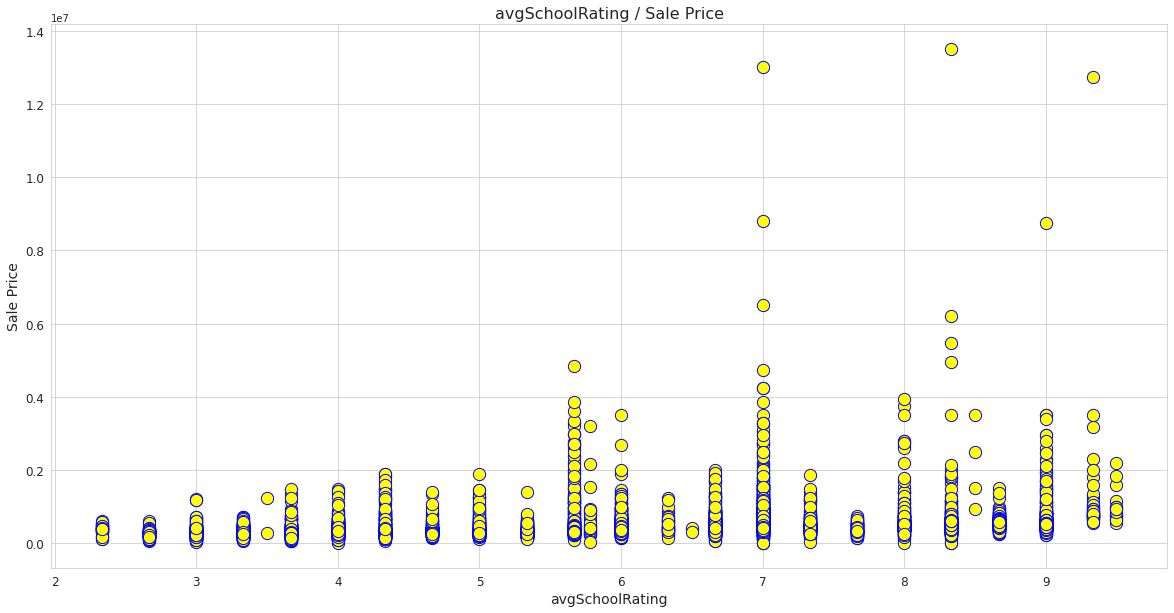

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


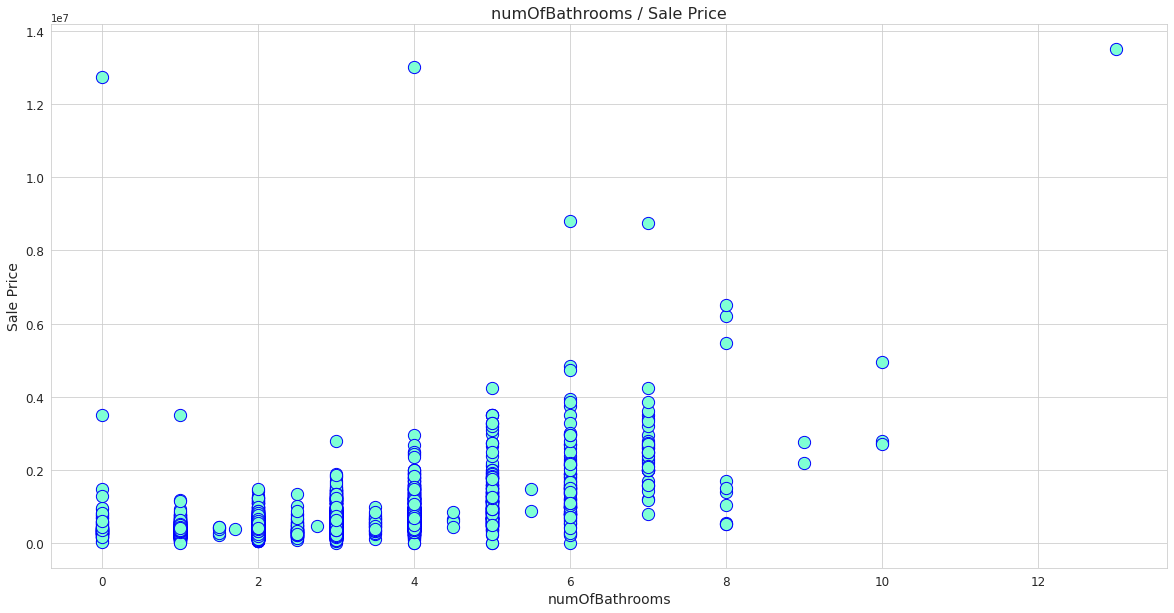

In [21]:

# 2. Scatter plot

def scatter_df(y_var):
    scatter_df = df.drop(y_var, axis = 1)
    i = df.columns
    
    plot1 = sb.scatterplot(i[0], y_var, data = df, color = 'orange', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[0]), fontsize = 16)
    plt.xlabel('{}'.format(i[0]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter1.png')
    plt.show()
    
    plot2 = sb.scatterplot(i[1], y_var, data = df, color = 'yellow', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[1]), fontsize = 16)
    plt.xlabel('{}'.format(i[1]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter2.png')
    plt.show()
    
    plot3 = sb.scatterplot(i[2], y_var, data = df, color = 'aquamarine', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[2]), fontsize = 16)
    plt.xlabel('{}'.format(i[2]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter3.png')
    plt.show()
           
plt.rcParams['figure.figsize'] = (20, 10) # plot size
scatter_df('latestPrice')

In [22]:
X_var = df[['livingAreaSqFt','avgSchoolRating','numOfBathrooms']].values
y_var = df['latestPrice'].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[0:5])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:5])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:5])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:5])





X_train samples :  [[2.31400000e+03 4.33333333e+00 3.00000000e+00]
 [2.02000000e+03 8.33333333e+00 2.00000000e+00]
 [9.60000000e+02 3.66666667e+00 1.00000000e+00]
 [5.03500000e+03 7.00000000e+00 6.00000000e+00]
 [3.61400000e+03 8.33333333e+00 4.00000000e+00]]
X_test samples :  [[1.65200000e+03 5.33333333e+00 2.00000000e+00]
 [2.94800000e+03 8.00000000e+00 3.00000000e+00]
 [1.94300000e+03 3.33333333e+00 2.00000000e+00]
 [1.89200000e+03 9.00000000e+00 3.00000000e+00]
 [2.18000000e+03 9.00000000e+00 2.00000000e+00]]
y_train samples :  [275000 488350 305000 799000 800000]
y_test samples :  [250000 799000 310000 700000 420000]


In [23]:
# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# 2. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# 3. Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

# 4. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# 5. ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

In [24]:
# 1. Explained Variance Score

print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 0.21637302288760485
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.21638624107484605
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.21637303276336317
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 0.2167025896949144
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.21738485014493947
-------------------------------------------------------------------------------


In [25]:
# 2. R-squared

print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is 0.21634662485215927
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.21635983490677624
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.2163466347212596
-------------------------------------------------------------------------------
R-Squared of Bayesian model is 0.21667598823745526
-------------------------------------------------------------------------------
R-Squared of ElasticNet is 0.21735782320932207
-------------------------------------------------------------------------------


In [28]:
from google.colab import files
uploaded = files.upload()

Saving AustinHousingDataRough_2.csv to AustinHousingDataRough_2.csv


In [29]:
import io
housing_data_df_2 = pd.read_csv(io.BytesIO(uploaded['AustinHousingDataRough_2.csv']))

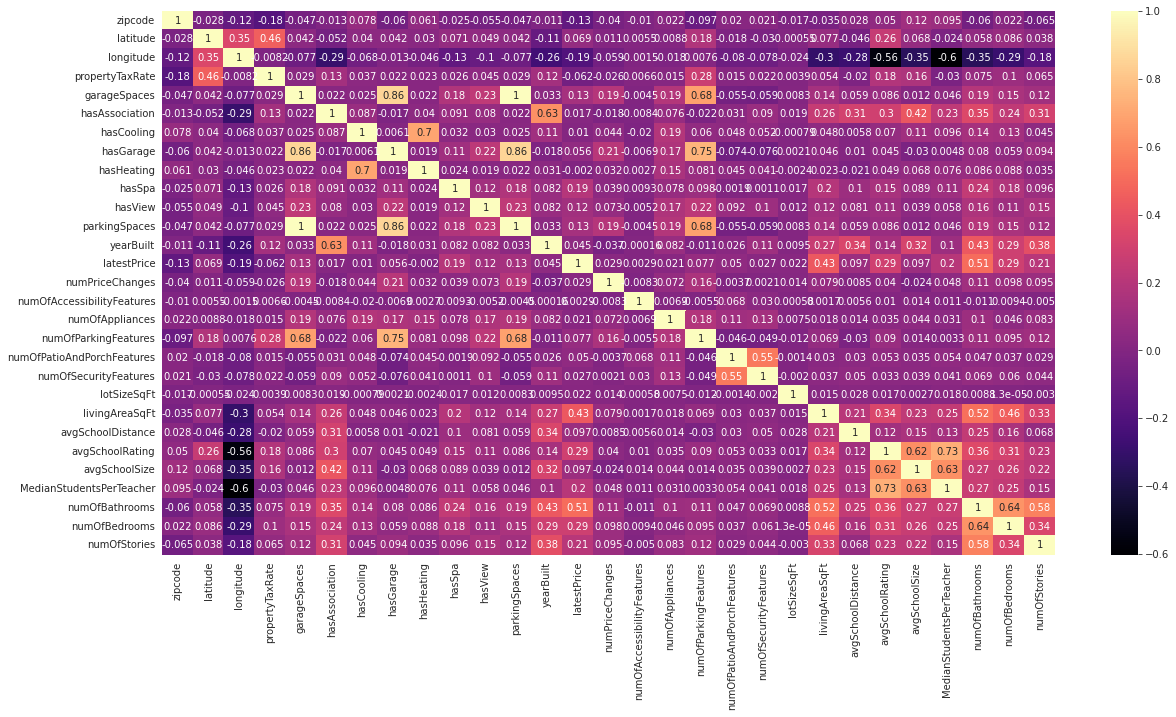

In [30]:
sb.heatmap(housing_data_df_2.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.rcParams['figure.figsize'] = (40, 20) # plot size
plt.show()

In [31]:
print(cl(housing_data_df_2.dtypes, attrs = ['bold']))

city                           object
zipcode                         int64
latitude                      float64
longitude                     float64
propertyTaxRate               float64
garageSpaces                    int64
hasAssociation                   bool
hasCooling                       bool
hasGarage                        bool
hasHeating                       bool
hasSpa                           bool
hasView                          bool
homeType                       object
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                     int64
numPriceChanges                 int64
numOfAccessibilityFeatures      int64
numOfAppliances                 int64
numOfParkingFeatures            int64
numOfPatioAndPorchFeatures      int64
numOfSecurityFeatures           int64
lotSizeSqFt                   float64
livingAreaSqFt                  int64
avgSchoolDistance             float64
avgSchoolRating               float64
avgSchoolSiz

In [ ]:
df2 = housing_data_df_2[['zipcode','garageSpaces','parkingSpaces','yearBuilt','latestPrice','numPriceChanges','numOfAccessibilityFeatures','numOfAppliances','numOfParkingFeatures','numOfPatioAndPorchFeatures','numOfSecurityFeatures','lotSizeSqFt','livingAreaSqFt',,]]